In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
white_wine = pd.read_csv("wine-white.csv")
red_wine = pd.read_csv("wine-red.csv")

In [4]:
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

In [5]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

In [6]:
wines = pd.concat([red_wine, white_wine])

In [7]:
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [9]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']

rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

# 1D

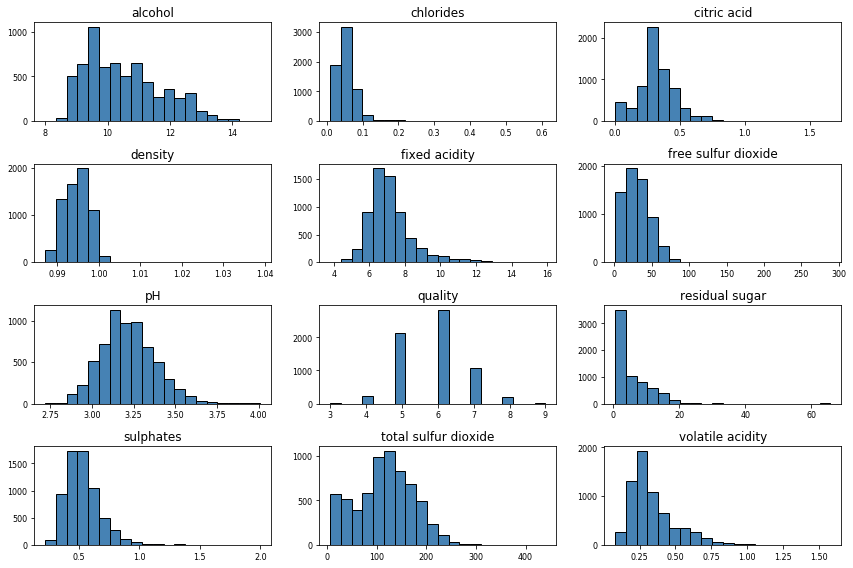

In [31]:
wines.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 2, 2))

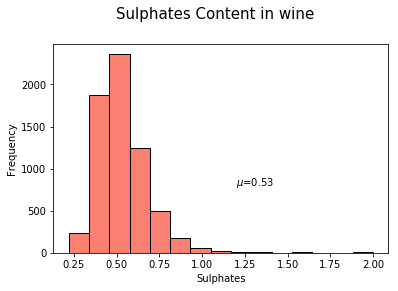

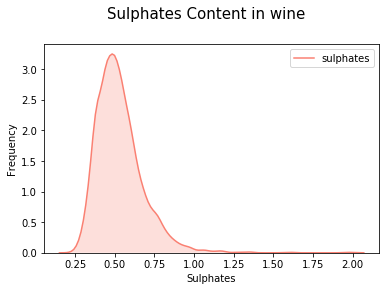

In [41]:
#histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in wine", fontsize=15)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)))
freq, bins, patches = ax.hist(wines['sulphates'], color='salmon', bins=15, edgecolor='black', linewidth=1)

#density plot
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in wine", fontsize=15)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency")
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='salmon')

<BarContainer object of 7 artists>

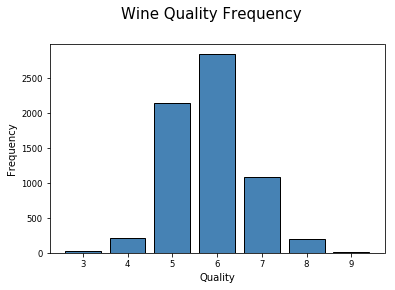

In [11]:
# bar graph
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Wine Quality Frequency", fontsize=15)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency")
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax1.tick_params(axis='both', which='major', labelsize=8.5)
ax1.bar(w_q[0], w_q[1], color='steelblue', edgecolor='black', linewidth=1)

# 2D

Text(0.5,0.98,'Wine Attributes Correlation Heatmap')

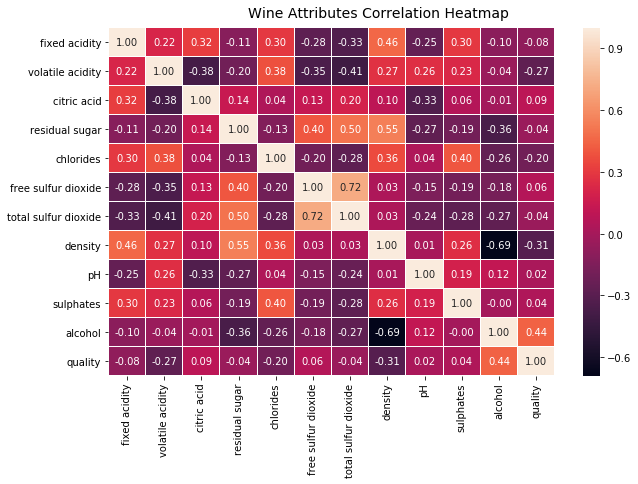

In [63]:
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()

sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="rocket", fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

Text(0.5,0.98,'Wine Attributes Pairwise Plots')

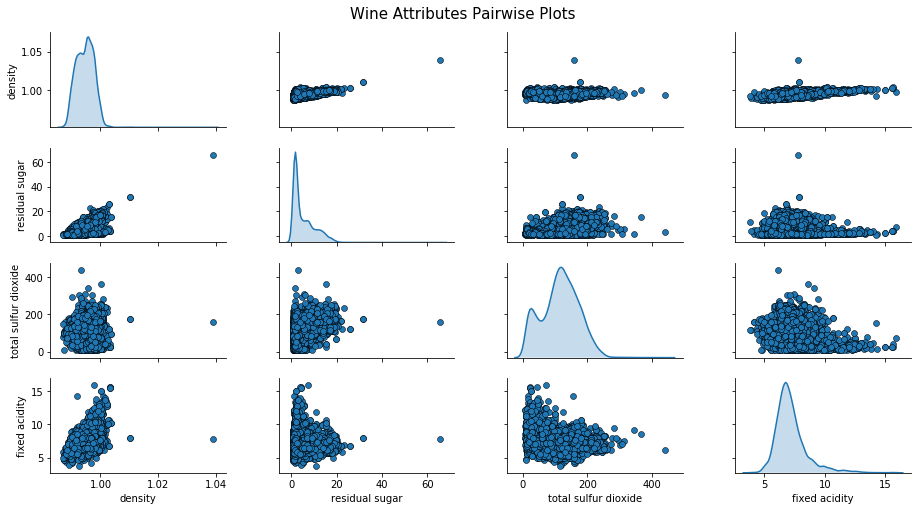

In [69]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']

pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Wine Attributes Pairwise Plots', fontsize=15)

In [13]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
subset_df = wines[cols]

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
scaled_df = sc.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=cols)
final_df = pd.concat([scaled_df, wines['wine_type']], axis=1)
final_df.head()

,density,residual sugar,total sulfur dioxide,fixed acidity,wine_type
0,-0.165631,1.546371,0.181456,-0.166089,white
1,0.301278,-0.681719,0.305311,0.373895,red
2,-0.859324,0.411306,0.305311,-0.320370,white
3,0.408001,1.210056,1.189993,-0.706073,white
4,1.395180,1.777588,2.003900,0.142473,white


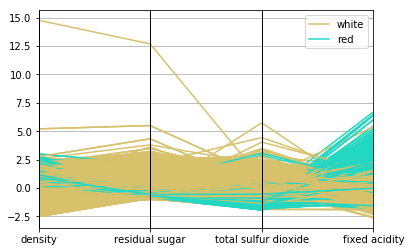

In [17]:
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'wine_type')

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


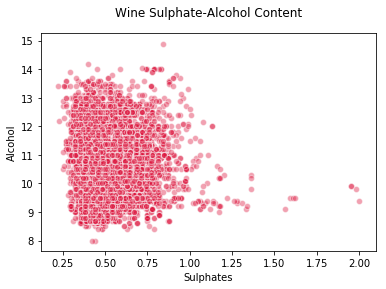

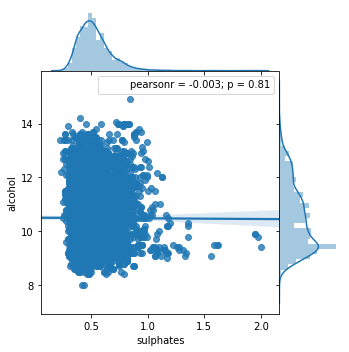

In [19]:
#Scatter Plot
plt.scatter(wines['sulphates'], wines['alcohol'], alpha=0.4, edgecolors='w', color='crimson')
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphate-Alcohol Content', y=1.05)

#Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines, kind='reg', space=0, size=5, ratio=4)

<BarContainer object of 7 artists>

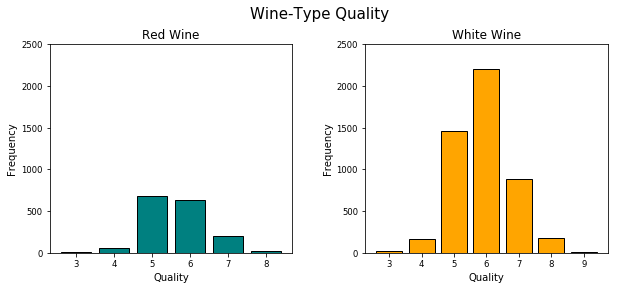

In [20]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Wine-Type Quality", fontsize=15)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency")
rw_q = red_wine['quality'].value_counts()
ax1.set_ylim([0, 2500])
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.tick_params(axis='both', which='major', labelsize=8.5)
ax1.bar(rw_q[0], rw_q[1], color='teal', edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency")
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
ax2.bar(ww_q[0], ww_q[1], color='orange', edgecolor='black', linewidth=1)

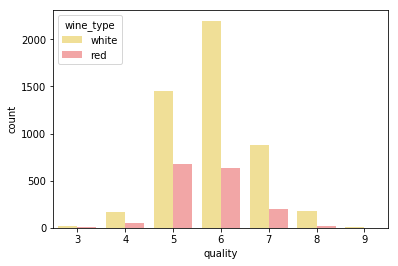

In [21]:
#Multi bar plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines, palette={"red": "#FF9999", "white": "#FFE888"})

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


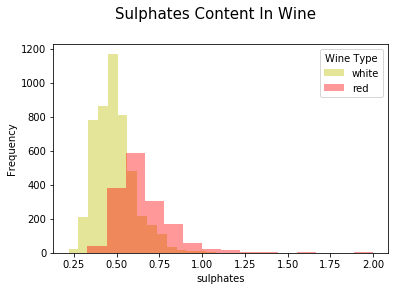

In [25]:
#Multiple histograms
fig = plt.figure(figsize = (6, 4))
title = plt.suptitle('Sulphates Content In Wine', fontsize=15)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")

g = sns.FacetGrid(wines, hue="wine_type", palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

Text(0,0.5,'Wine Alcohol %')

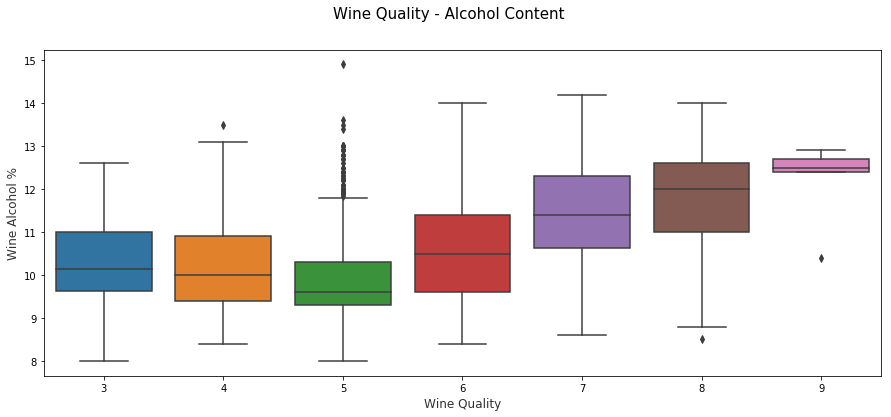

In [27]:
#Box plot
f, (ax) = plt.subplots(1, 1, figsize=(15, 6))
f.suptitle('Wine Quality - Alcohol Content', fontsize=15)

sns.boxplot(x="quality", y="alcohol", data=wines, ax=ax)
ax.set_xlabel("Wine Quality", size=12, alpha=0.8)
ax.set_ylabel("Wine Alcohol %", size=12, alpha=0.8)

Text(0,0.5,'Wine Sulphates')

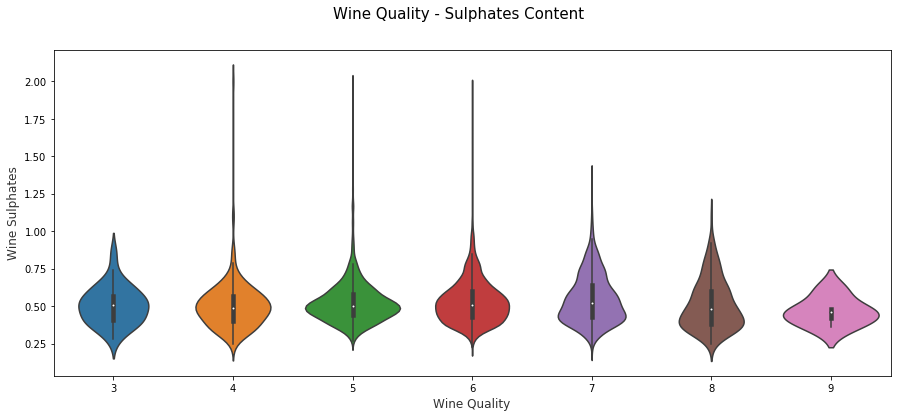

In [28]:
#Voilin plot
f, (ax) = plt.subplots(1, 1, figsize=(15, 6))
f.suptitle('Wine Quality - Sulphates Content', fontsize=15)

sns.violinplot(x="quality", y="sulphates", data=wines, ax=ax)
ax.set_xlabel("Wine Quality", size=12, alpha=0.8)
ax.set_ylabel("Wine Sulphates", size=12, alpha=0.8)

#  3D

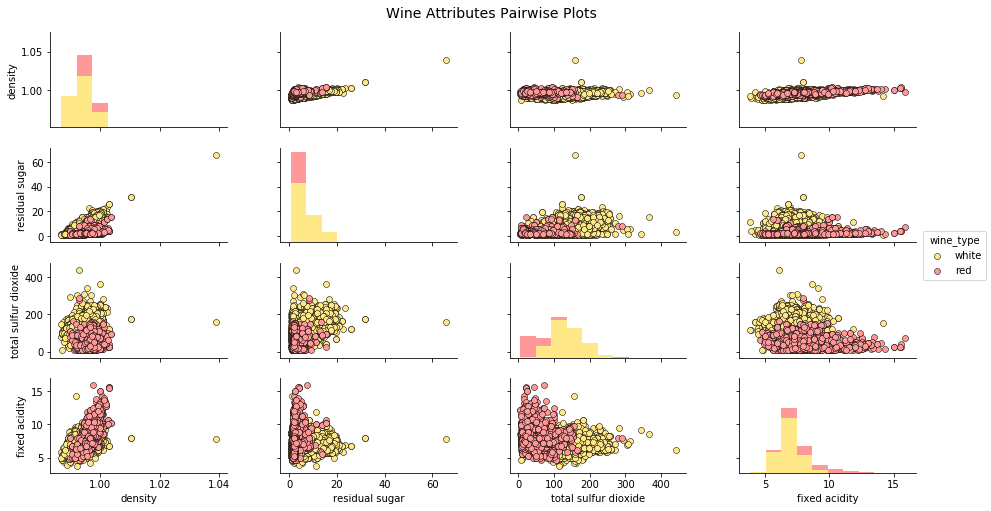

In [32]:
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, palette={"red": "#FF9999", "white": "#FFE888"}, plot_kws=dict(edgecolor="black", linewidth=0.5))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Text(0.5,0,'Alcohol')

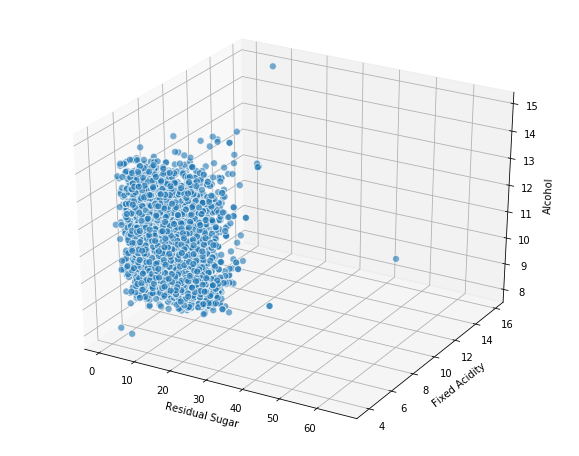

In [33]:
#3d
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors="w")

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

Text(0.5,1.05,'Wine Alcohol Content - Fixed Acidity - Residual Sugar')

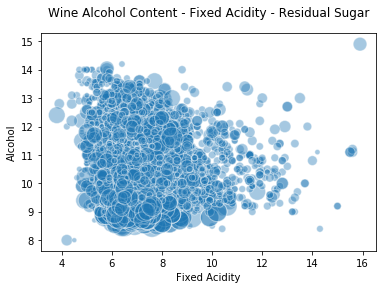

In [35]:
# bubble chart with size
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, alpha=0.4, edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar', y=1.05)

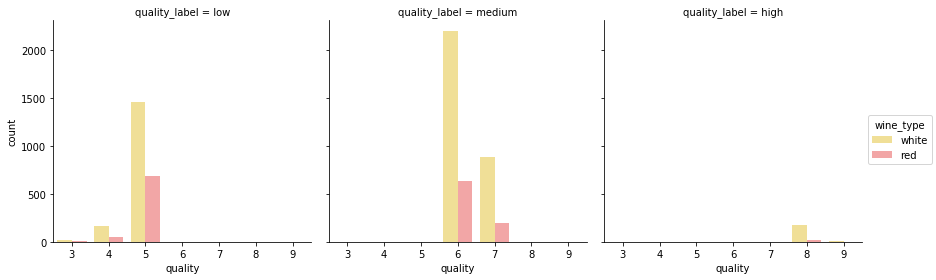

In [36]:
sns.factorplot(x="quality", hue="wine_type", col="quality_label", data=wines, kind="count", palette={"red": "#FF9999", "white": "#FFE888"})

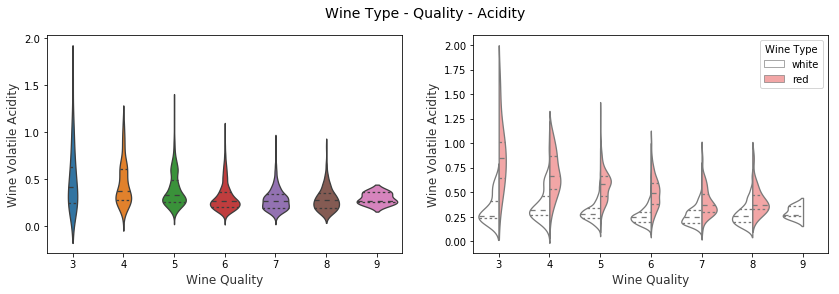

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

# 4D

Text(0.5,0,'Fixed Acidity')

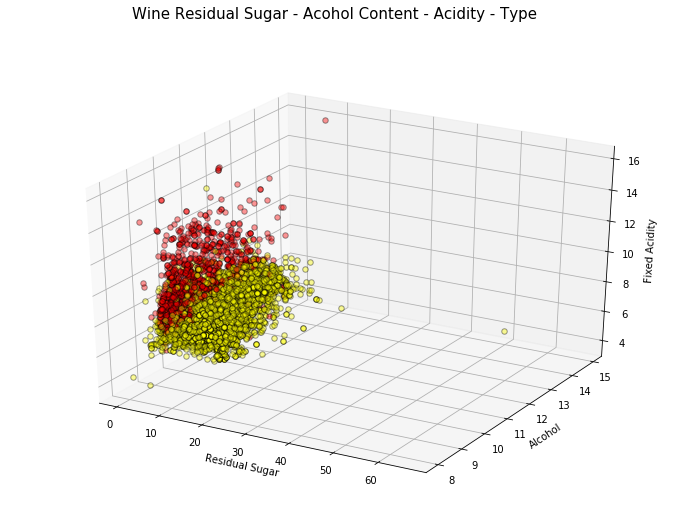

In [44]:
fig = plt.figure(figsize=(12,8))
t = fig.suptitle('Wine Residual Sugar - Acohol Content - Acidity - Type', fontsize=15)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Text(0.5,1.06,'Wine Alcohol Content - Fixed Acidity - Residual Sugar - type')

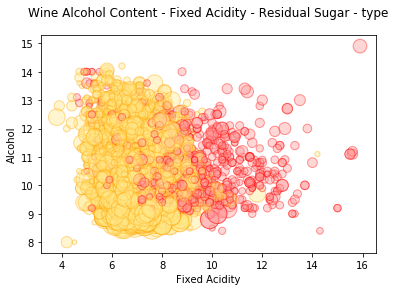

In [46]:
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt == 'red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt == 'red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, alpha=0.4, color=fill_colors, edgecolors=edge_colors)
plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - type', y=1.06)

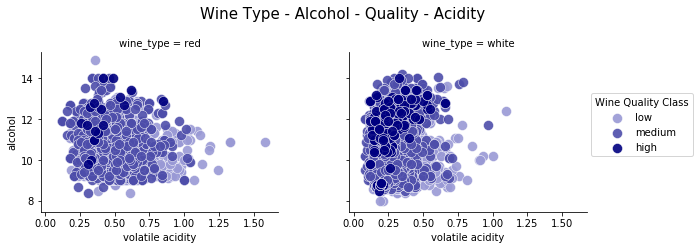

In [48]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', col_order=['red', 'white'], hue_order=['low', 'medium', 'high'], aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, edgecolor='white', linewidth=0.5, s=100)

fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=15)
g.add_legend(title='Wine Quality Class')

Text(0.5,0,'Fixed Acidity')

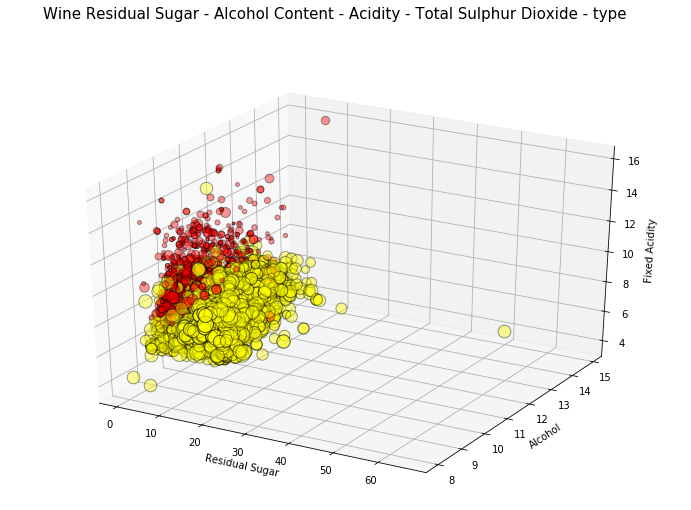

In [51]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulphur Dioxide - type', fontsize=15)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors = 'none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')